In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score

In [31]:
df = pd.read_csv("../dataset/cybersecurity_attacks.csv")
df.head().T

0  \
Timestamp                                             2023-05-30 06:33:58   
Source IP Address                                           103.216.15.12   
Destination IP Address                                       84.9.164.252   
Source Port                                                         31225   
Destination Port                                                    17616   
Protocol                                                             ICMP   
Packet Length                                                         503   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Qui natus odio asperiores nam. Optio nobis ius...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                      28.67   
Alerts/Warnings                                                       NaN   
Attack Type                                                       Malware   
Attack Signature                                          Known Pattern B   
Action Taken                                                       Logged   
Severity Level                                                        Low   
User Information                                            Reyansh Dugal   
Device Information      Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...   
Network Segment                                                 Segment A   
Geo-location Data                                      Jamshedpur, Sikkim   
Proxy Information                                            150.9.97.135   
Firewall Logs                                                    Log Data   
IDS/IPS Alerts                                                        NaN   
Log Source                                                         Server   

                                                                        1  \
Timestamp                                             2020-08-26 07:08:30   
Source IP Address                                          78.199.217.198   
Destination IP Address                                     66.191.137.154   
Source Port                                                         17245   
Destination Port                                                    48166   
Protocol                                                             ICMP   
Packet Length                                                        1174   
Packet Type                                                          Data   
Traffic Type                                                         HTTP   
Payload Data            Aperiam quos modi officiis veritatis rem. Omni...   
Malware Indicators                                           IoC Detected   
Anomaly Scores                                                       51.5   
Alerts/Warnings                                                       NaN   
Attack Type                                                       Malware   
Attack Signature                                          Known Pattern A   
Action Taken                                                      Blocked   
Severity Level                                                        Low   
User Information                                               Sumer Rana   
Device Information      Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...   
Network Segment                                                 Segment B   
Geo-location Data                                      Bilaspur, Nagaland   
Proxy Information                                                     NaN   
Firewall Logs                                                    Log Data   
IDS/IPS Alerts                                                        NaN   
Log Source                                                       Firewall   

                                                                  

In [32]:
df.groupby("Attack Type").describe().T

Attack Type                     DDoS     Intrusion       Malware
Source Port      count  13428.000000  13265.000000  13307.000000
                 mean   32944.896932  32987.208217  32979.248892
                 std    18612.927467  18561.266193  18507.826405
                 min     1027.000000   1031.000000   1033.000000
                 25%    16782.500000  16887.000000  16931.000000
                 50%    32851.500000  32687.000000  33044.000000
                 75%    49073.250000  49023.000000  48692.000000
                 max    65530.000000  65525.000000  65530.000000
Destination Port count  13428.000000  13265.000000  13307.000000
                 mean   33207.363941  33227.405880  33017.563989
                 std    18622.747957  18541.304784  18559.986472
                 min     1029.000000   1043.000000   1024.000000
                 25%    17089.250000  17228.000000  16995.500000
                 50%    32986.000000  33035.000000  32984.000000
                 75%    49302.500000  49586.000000  48928.000000
                 max    65535.000000  65534.000000  65535.000000
Packet Length    count  13428.000000  13265.000000  13307.000000
                 mean     785.348749    780.924387    778.047945
                 std      416.685412    418.209936    413.221127
                 min       64.000000     64.000000     64.000000
                 25%      424.000000    412.000000    426.000000
                 50%      786.000000    785.000000    777.000000
                 75%     1150.000000   1145.000000   1135.000000
                 max     1500.000000   1500.000000   1500.000000
Anomaly Scores   count  13428.000000  13265.000000  13307.000000
                 mean      50.235063     49.978029     50.125794
                 std       28.857465     28.815402     28.889315
                 min        0.000000      0.000000      0.010000
                 25%       25.470000     24.840000     25.055000
                 50%       50.420000     50.180000     50.420000
                 75%       75.070000     74.690000     75.280000
                 max       99.990000    100.000000     99.990000

array([[<Axes: title={'center': 'Source Port'}>,
        <Axes: title={'center': 'Destination Port'}>],
       [<Axes: title={'center': 'Packet Length'}>,
        <Axes: title={'center': 'Anomaly Scores'}>]], dtype=object)

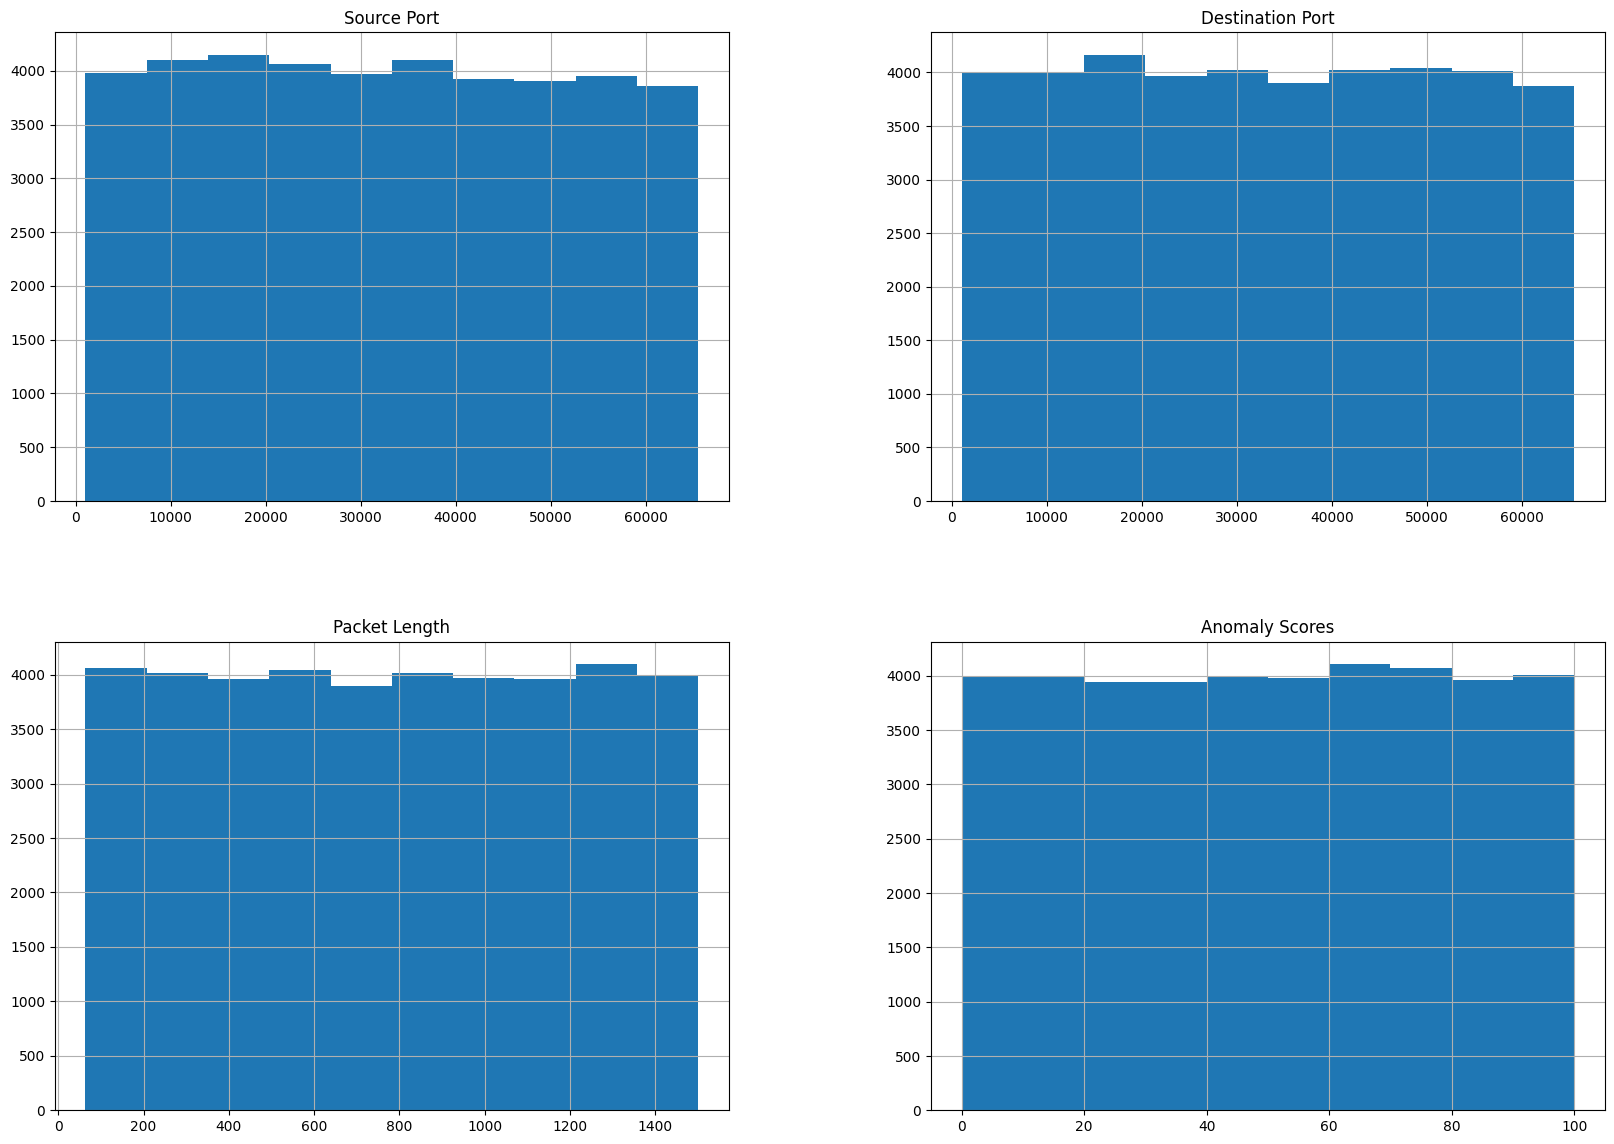

In [29]:
df.hist(figsize=(20, 14))

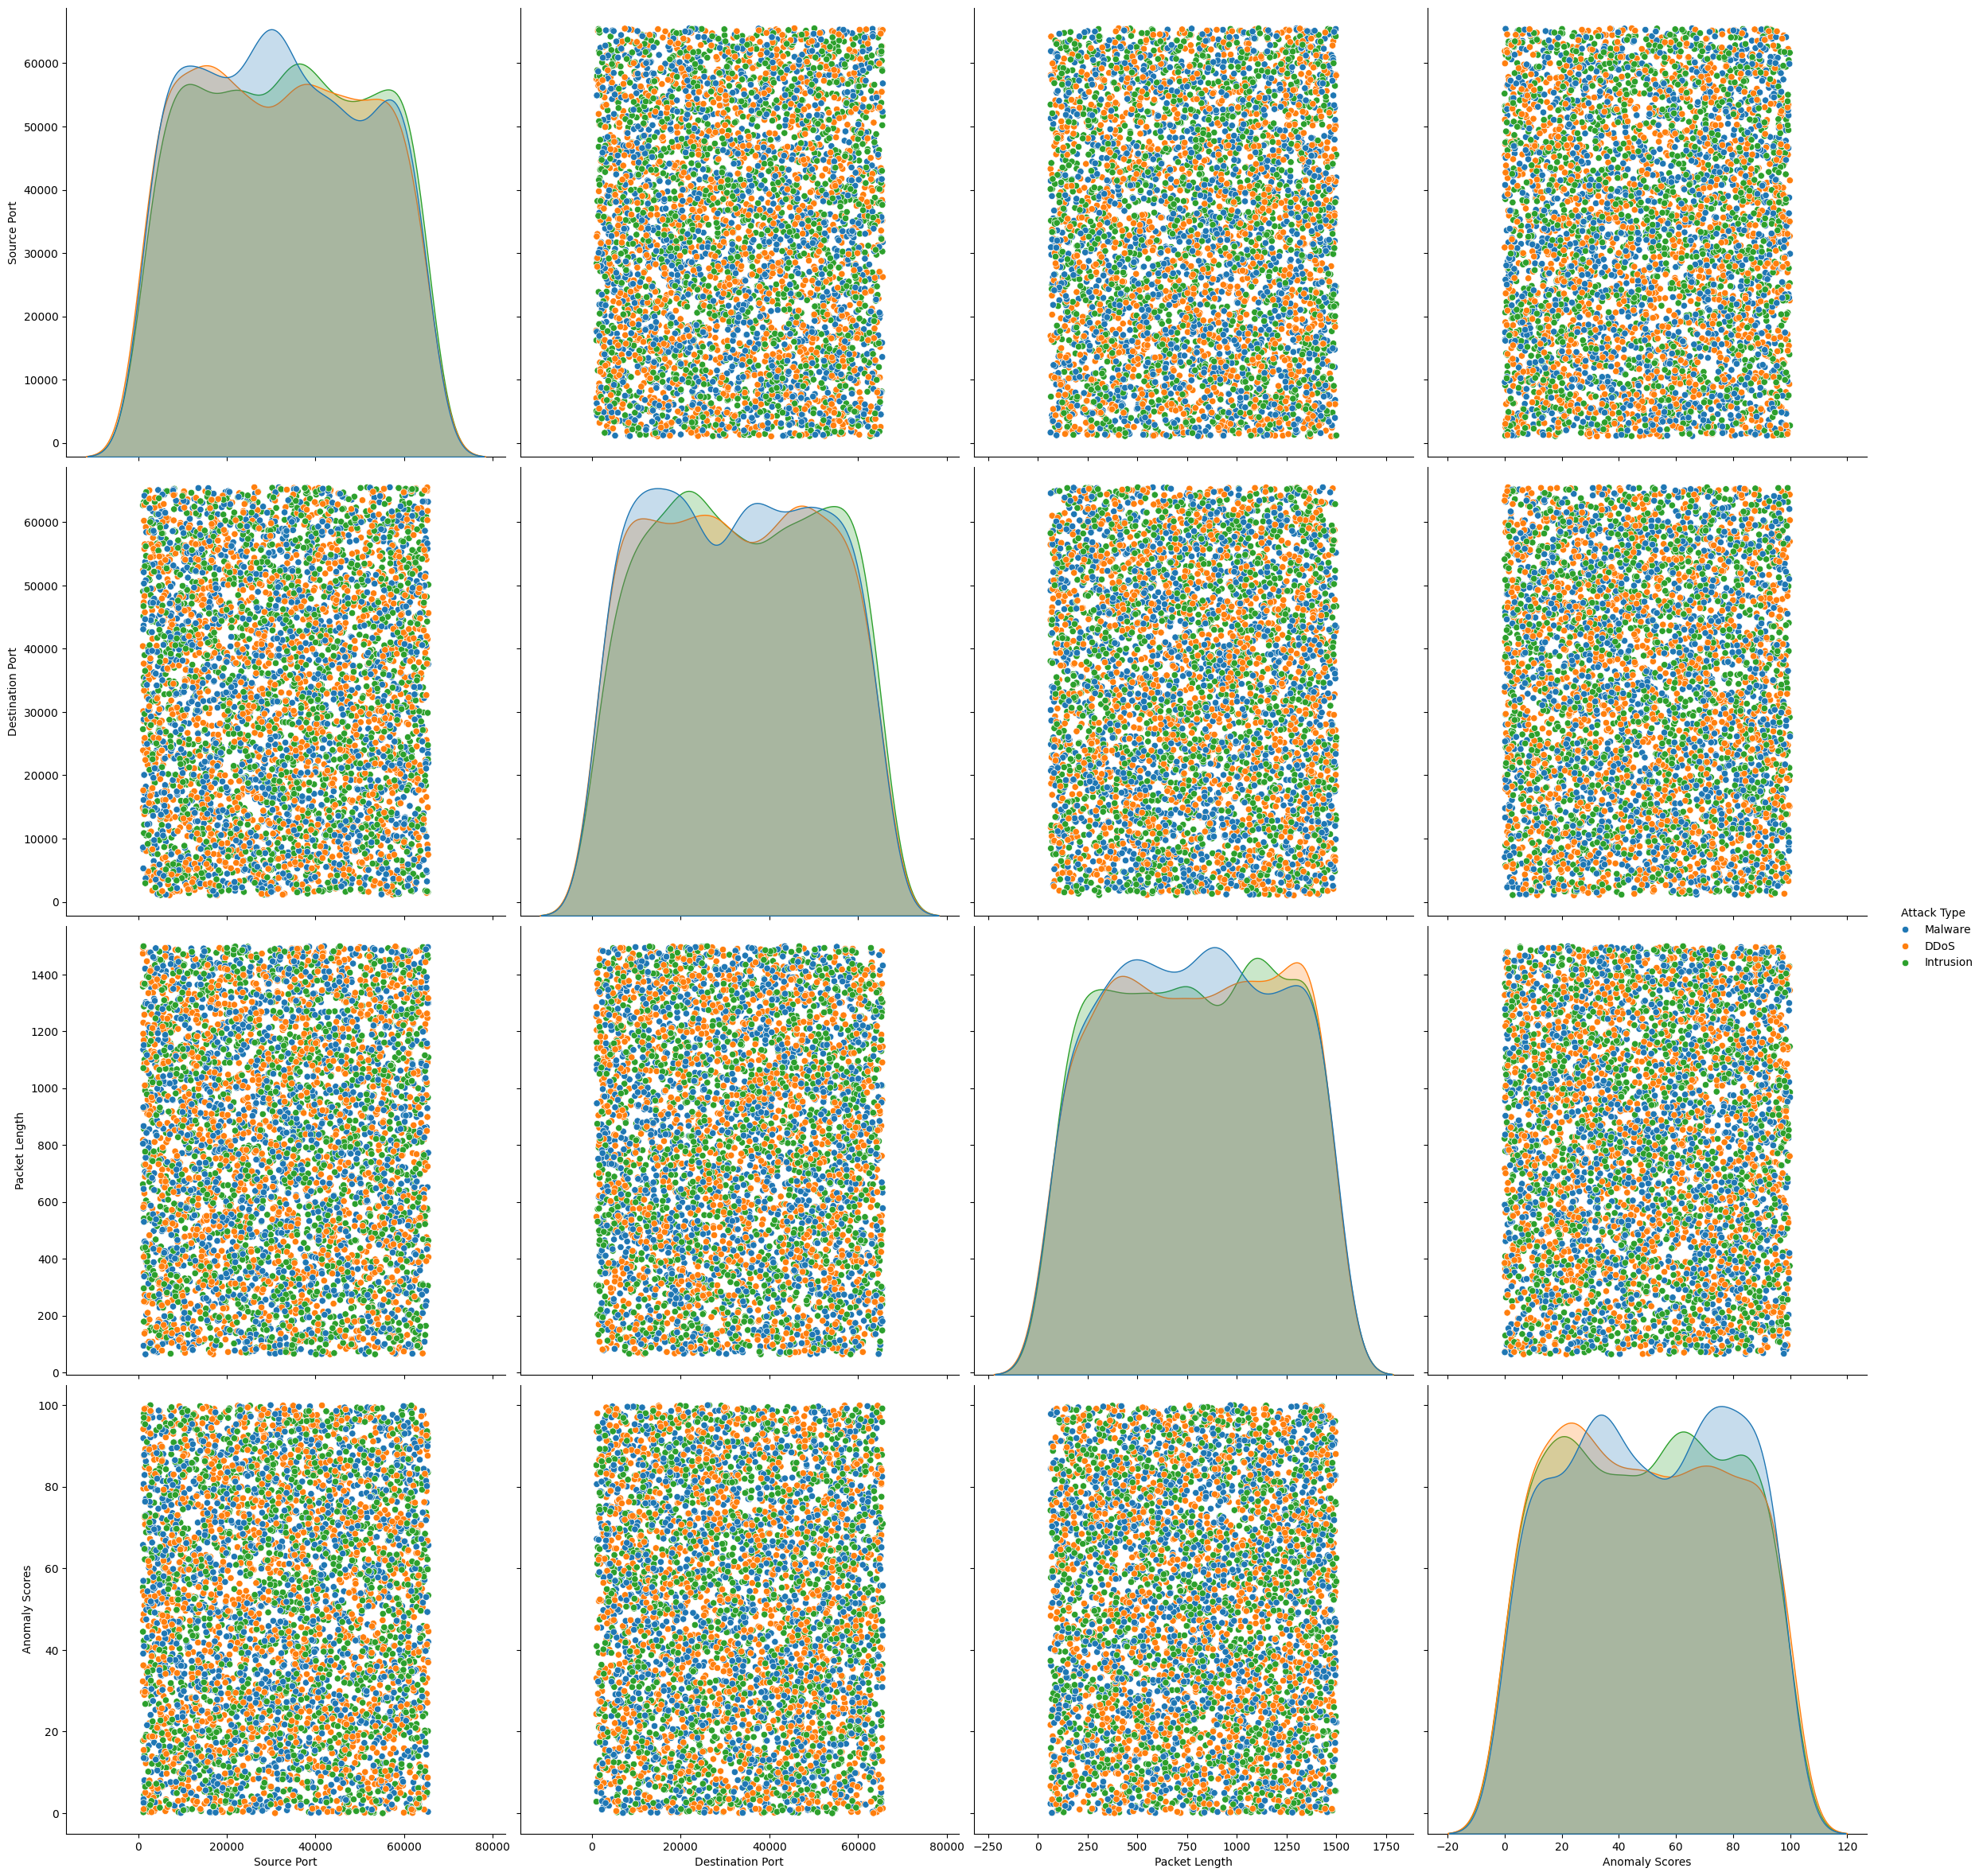

In [38]:

sns.pairplot(df[:5000], hue="Attack Type", height=6)

In [6]:
df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

In [17]:
to_drop_cols = ['Payload Data','User Information','Device Information',
             'Geo-location Data','Source IP Address','Destination IP Address','Packet Length']
df = df.drop(to_drop_cols, axis=1)

In [18]:
df['Alerts/Warnings'] = df['Alerts/Warnings'].notna().astype(int)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].notna().astype(int)
df['Malware Indicators'] = df['Malware Indicators'].notna().astype(int)
df['Firewall Logs'] = df['Firewall Logs'].notna().astype(int)
df['Proxy Information'] = df['Proxy Information'].notna().astype(int)

In [9]:
df.head()

Timestamp Protocol Packet Type Traffic Type  Malware Indicators  \
0  2023-05-30 06:33:58     ICMP        Data         HTTP                   1   
1  2020-08-26 07:08:30     ICMP        Data         HTTP                   1   
2  2022-11-13 08:23:25      UDP     Control         HTTP                   1   
3  2023-07-02 10:38:46      UDP        Data         HTTP                   0   
4  2023-07-16 13:11:07      TCP        Data          DNS                   0   

   Anomaly Scores  Alerts/Warnings Attack Type Attack Signature Action Taken  \
0           28.67                0     Malware  Known Pattern B       Logged   
1           51.50                0     Malware  Known Pattern A      Blocked   
2           87.42                1        DDoS  Known Pattern B      Ignored   
3           15.79                1     Malware  Known Pattern B      Blocked   
4            0.52                1        DDoS  Known Pattern B      Blocked   

  Severity Level Network Segment  Proxy Information  Firewall Logs  \
0            Low       Segment A                  1              1   
1            Low       Segment B                  0              1   
2            Low       Segment C                  1              1   
3         Medium       Segment B                  0              0   
4            Low       Segment C                  1              0   

   IDS/IPS Alerts Log Source  
0               0     Server  
1               0   Firewall  
2               1   Firewall  
3               1   Firewall  
4               1   Firewall

In [18]:
proxy_counts = df.groupby(["Attack Type", "Proxy Information"]).size().unstack()
proxy_counts

Proxy Information     0     1
Attack Type                  
DDoS               6643  6785
Intrusion          6668  6597
Malware            6540  6767

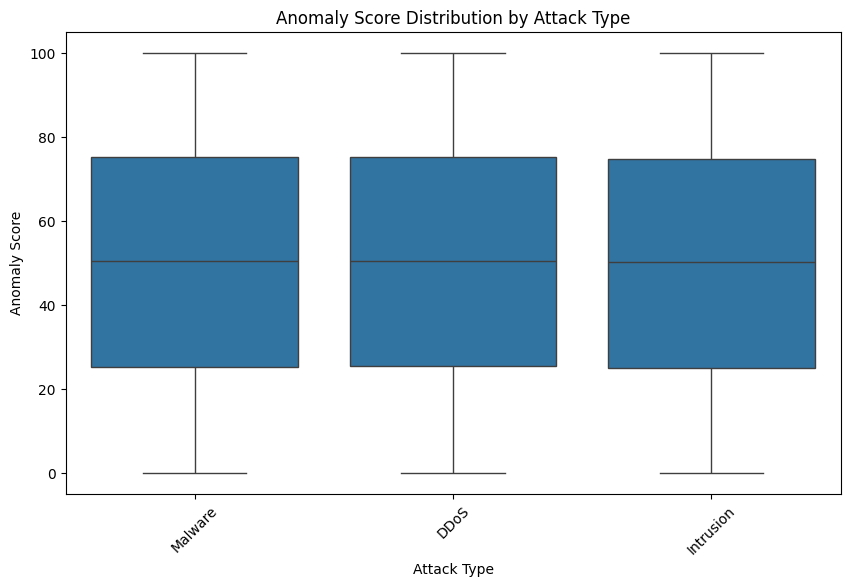

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Attack Type", y="Anomaly Scores", data=df)
plt.xlabel("Attack Type")
plt.ylabel("Anomaly Score")
plt.title("Anomaly Score Distribution by Attack Type")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

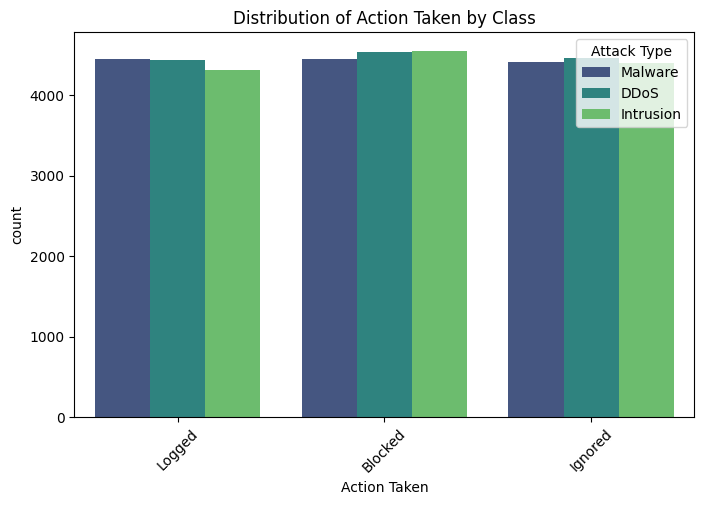

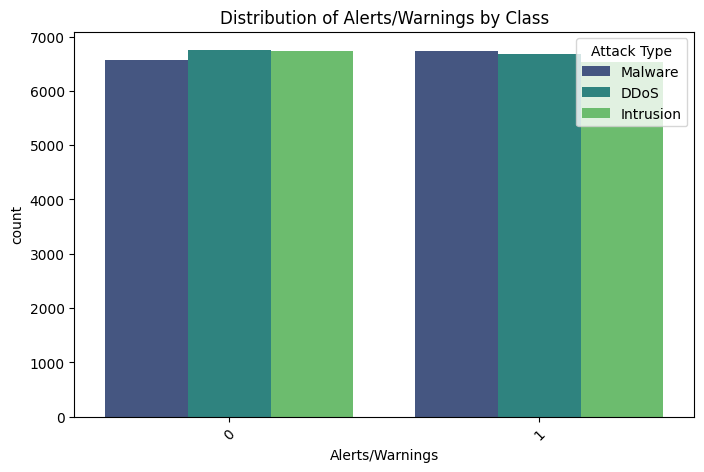

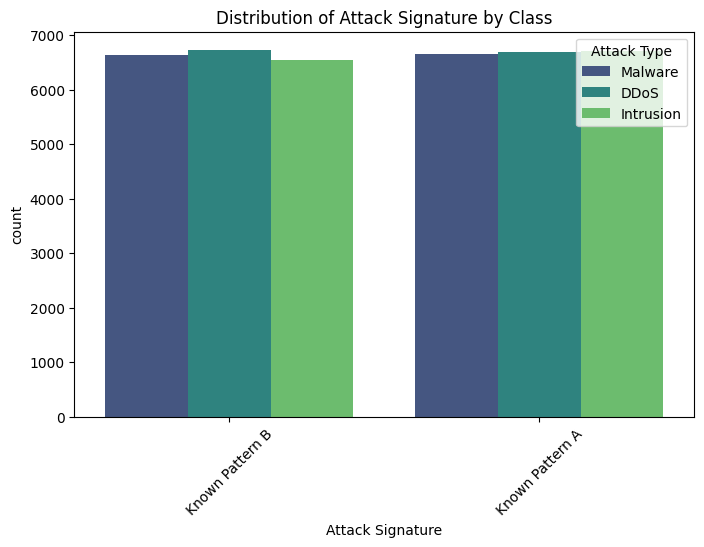

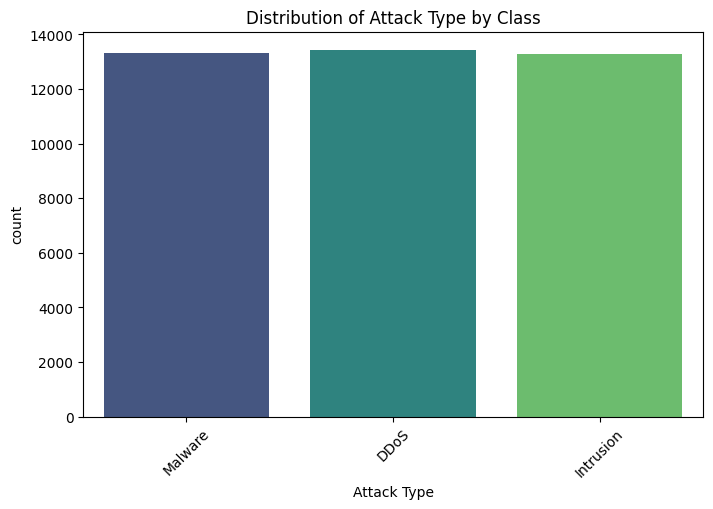

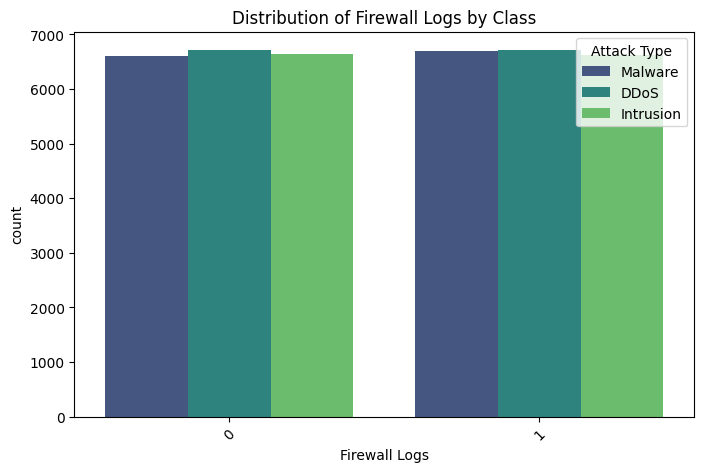

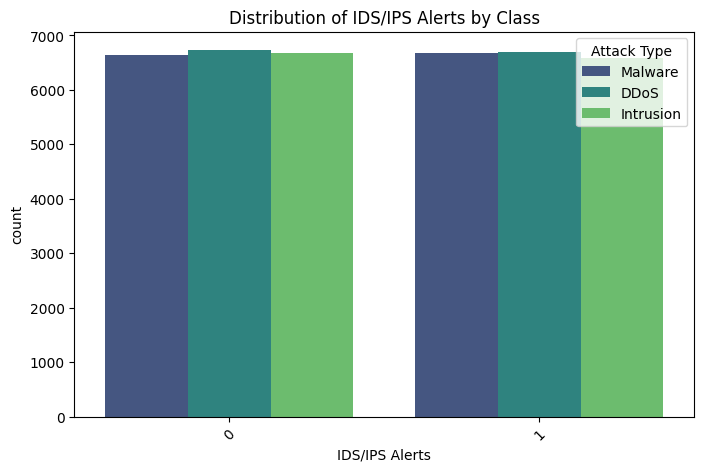

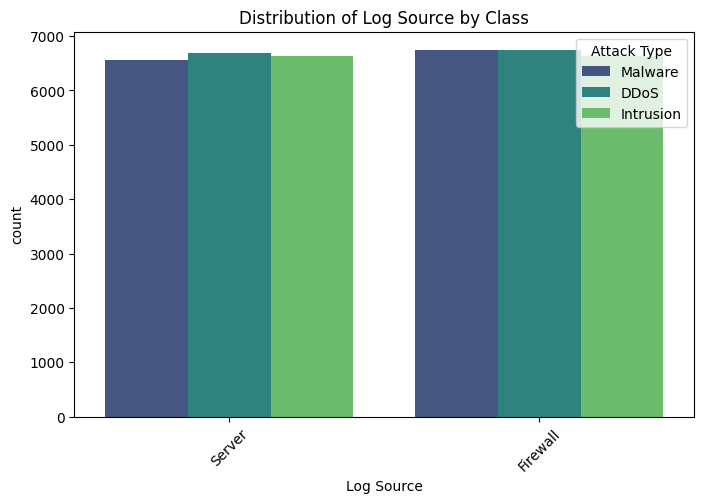

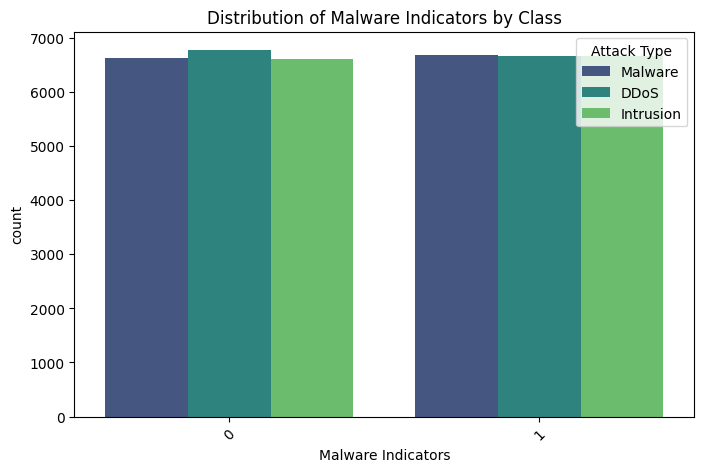

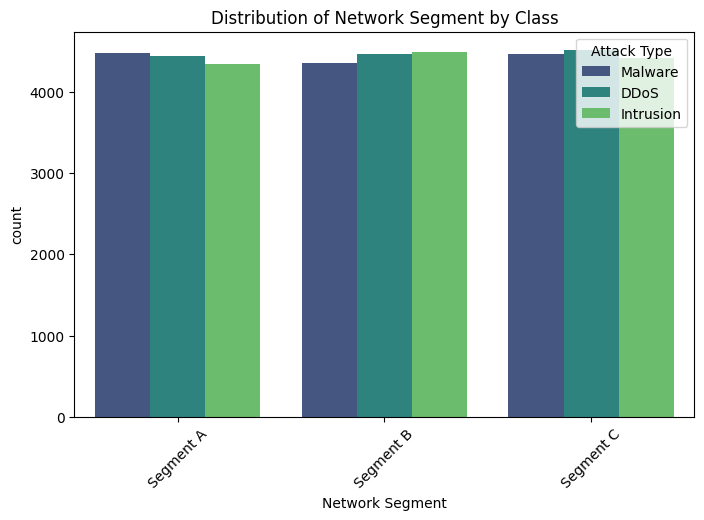

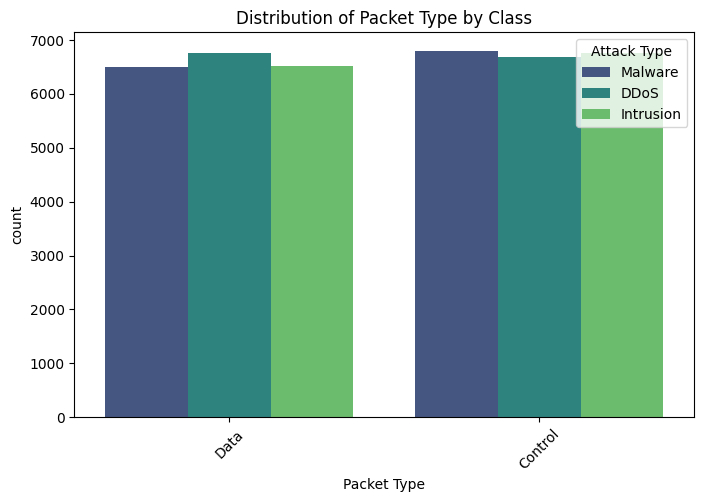

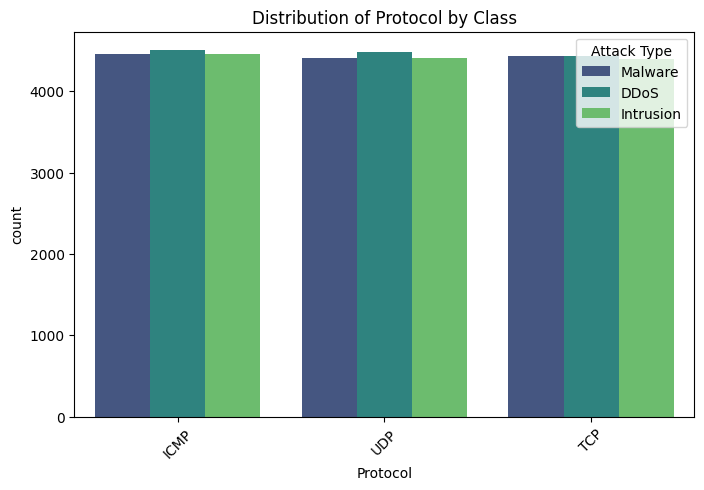

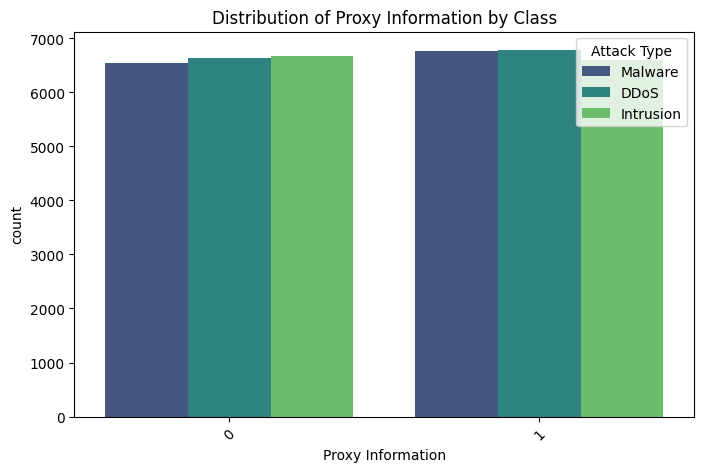

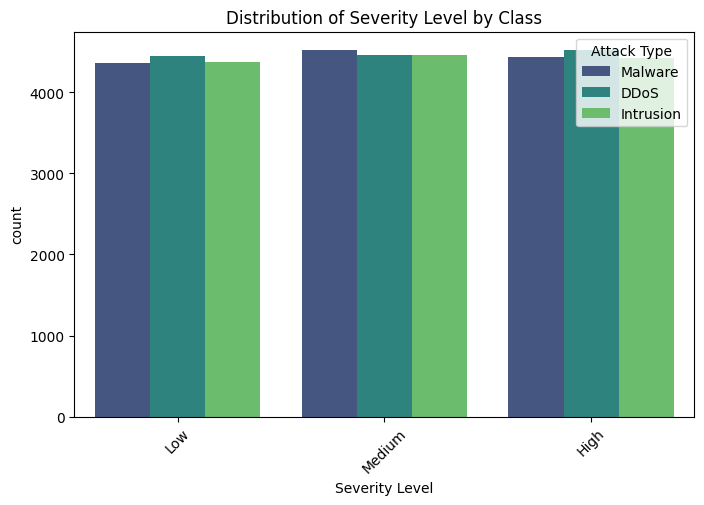

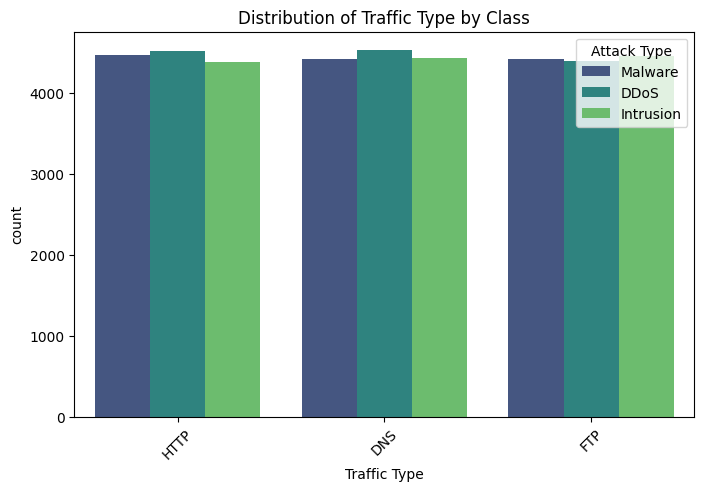

In [19]:
excluded_cols = ["Anomaly Scores","Timestamp", 'Source Port','Destination Port']  # Replace with actual column names
df_filtered = df.loc[:, df.columns.difference(excluded_cols)]
for feature in df_filtered.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, hue="Attack Type", palette="viridis")
    plt.title(f"Distribution of {feature} by Class")
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()

## timestamp analysis 

In [20]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"]) 
df["Hour"] = df["Timestamp"].dt.hour  
df["Day"] = df["Timestamp"].dt.day
df['Month'] = df["Timestamp"].dt.month
df["Year"] = df["Timestamp"].dt.year
df["Day of Week"] = df["Timestamp"].dt.dayofweek  
attack_counts = df.groupby(["Hour", "Attack Type"]).size().unstack().fillna(0)
# df.set_index("Timestamp", inplace=True)  # Set timestamp as index

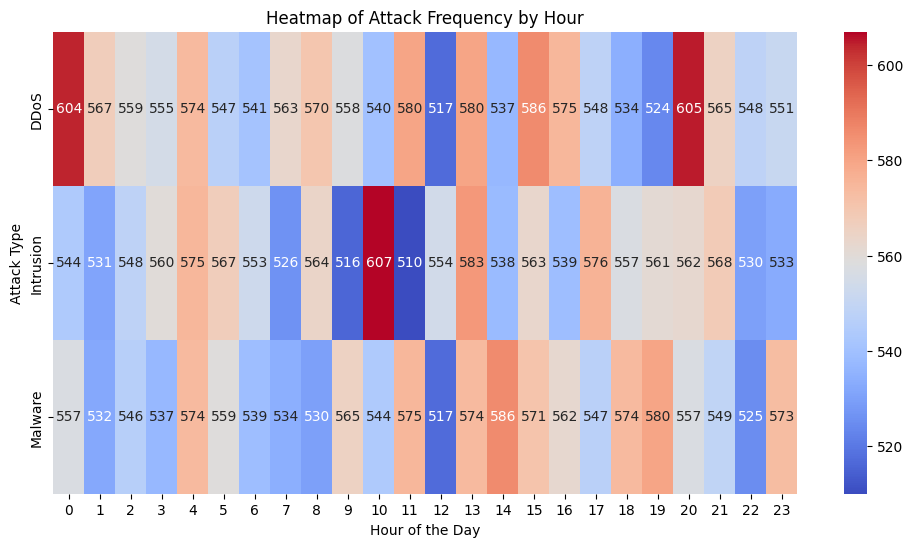

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(attack_counts.T, cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Hour of the Day")
plt.ylabel("Attack Type")
plt.title("Heatmap of Attack Frequency by Hour")
plt.show()

In [22]:
# Extract day of the week (0=Monday, 6=Sunday)


# Map numerical days to actual names
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
               4: "Friday", 5: "Saturday", 6: "Sunday"}
df["Day of Week"] = df["Day of Week"].map(day_mapping)

# Count occurrences of each Attack Type per day
attack_counts_week = df.groupby(["Day of Week", "Attack Type"]).size().unstack().fillna(0)

# Reorder days correctly
attack_counts_week = attack_counts_week.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", 
                                                 "Friday", "Saturday", "Sunday"])
# Display the result
print(attack_counts_week)

Attack Type  DDoS  Intrusion  Malware
Day of Week                          
Monday       1906       1902     1944
Tuesday      2050       1904     1859
Wednesday    1863       1856     1880
Thursday     1970       1858     1848
Friday       1877       1915     1961
Saturday     1857       1902     1904
Sunday       1905       1928     1911


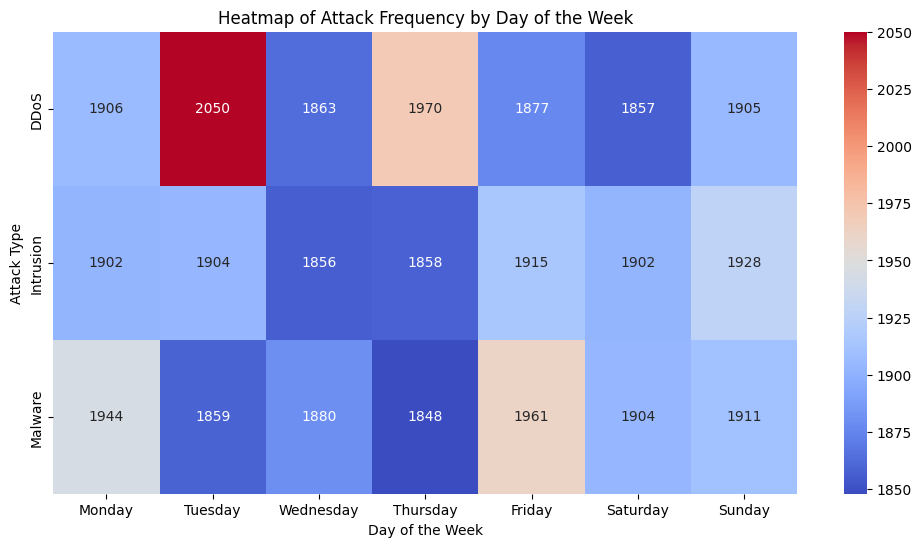

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(attack_counts_week.T, cmap="coolwarm", annot=True, fmt=".0f")
plt.xlabel("Day of the Week")
plt.ylabel("Attack Type")
plt.title("Heatmap of Attack Frequency by Day of the Week")
plt.show()

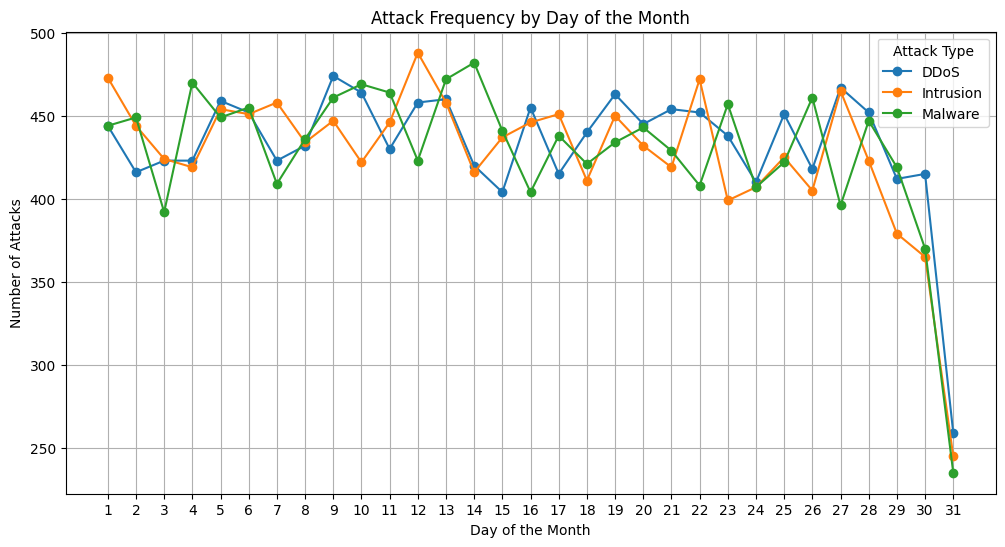

In [24]:
attack_counts_day = df.groupby(["Day","Attack Type"]).size().unstack().fillna(0)
attack_counts_day.plot(kind="line", marker="o", figsize=(12, 6))
plt.xlabel("Day of the Month")
plt.ylabel("Number of Attacks")
plt.title("Attack Frequency by Day of the Month")
plt.xticks(range(1, 32))  # Ensure all days are shown
plt.legend(title="Attack Type")
plt.grid()
plt.show()

In [27]:
df.head().T

0                    1  \
Timestamp           2023-05-30 06:33:58  2020-08-26 07:08:30   
Protocol                           ICMP                 ICMP   
Packet Type                        Data                 Data   
Traffic Type                       HTTP                 HTTP   
Malware Indicators                    1                    1   
Anomaly Scores                    28.67                 51.5   
Alerts/Warnings                       0                    0   
Attack Type                     Malware              Malware   
Attack Signature        Known Pattern B      Known Pattern A   
Action Taken                     Logged              Blocked   
Severity Level                      Low                  Low   
Network Segment               Segment A            Segment B   
Proxy Information                     1                    0   
Firewall Logs                         1                    1   
IDS/IPS Alerts                        0                    0   
Log Source                       Server             Firewall   
Hour                                  6                    7   
Day                                  30                   26   
Month                                 5                    8   
Year                               2023                 2020   
Day of Week                     Tuesday            Wednesday   

                                      2                    3  \
Timestamp           2022-11-13 08:23:25  2023-07-02 10:38:46   
Protocol                            UDP                  UDP   
Packet Type                     Control                 Data   
Traffic Type                       HTTP                 HTTP   
Malware Indicators                    1                    0   
Anomaly Scores                    87.42                15.79   
Alerts/Warnings                       1                    1   
Attack Type                        DDoS              Malware   
Attack Signature        Known Pattern B      Known Pattern B   
Action Taken                    Ignored              Blocked   
Severity Level                      Low               Medium   
Network Segment               Segment C            Segment B   
Proxy Information                     1                    0   
Firewall Logs                         1                    0   
IDS/IPS Alerts                        1                    1   
Log Source                     Firewall             Firewall   
Hour                                  8                   10   
Day                                  13                    2   
Month                                11                    7   
Year                               2022                 2023   
Day of Week                      Sunday               Sunday   

                                      4  
Timestamp           2023-07-16 13:11:07  
Protocol                            TCP  
Packet Type                        Data  
Traffic Type                        DNS  
Malware Indicators                    0  
Anomaly Scores                     0.52  
Alerts/Warnings                       1  
Attack Type                        DDoS  
Attack Signature        Known Pattern B  
Action Taken                    Blocked  
Severity Level                      Low  
Network Segment               Segment C  
Proxy Information                     1  
Firewall Logs                         0  
IDS/IPS Alerts                        1  
Log Source                     Firewall  
Hour                                 13  
Day                                  16  
Month                                 7  
Year                               2023  
Day of Week                      Sunday

In [25]:
target = "Attack Type"
x = df.drop([target,'Timestamp'],axis=1)
y = df[target]
print(x)

       Source Port  Destination Port Protocol Packet Type Traffic Type  \
0            31225             17616     ICMP        Data         HTTP   
1            17245             48166     ICMP        Data         HTTP   
2            16811             53600      UDP     Control         HTTP   
3            20018             32534      UDP        Data         HTTP   
4             6131             26646      TCP        Data          DNS   
...            ...               ...      ...         ...          ...   
39995        31005              6764      UDP     Control         HTTP   
39996         2553             28091      UDP     Control         HTTP   
39997        22505             25152      UDP        Data          DNS   
39998        20013              2703      UDP        Data          FTP   
39999        50137             55575     ICMP     Control         HTTP   

       Malware Indicators  Anomaly Scores  Alerts/Warnings Attack Signature  \
0                       1       

In [26]:
categorical_cols = x.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns as they are
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=10, random_state=42))
#     ('classifier', DecisionTreeClassifier(random_state=42))
])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
y_pred_train = pipeline.predict(x_train)
print("Accuracy Score on training set:", accuracy_score(y_train, y_pred_train))
print("Accuracy Score on testing set:", accuracy_score(y_test, y_pred))

Accuracy Score on training set: 0.98753125
Accuracy Score on testing set: 0.337875
